In [42]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dropout, Dense, BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

df = pd.read_csv("./assets/risk_profiles.csv")
df.drop(["total_score"], axis=1, inplace=True)

m_data = np.array(df)

In [43]:
X = np.zeros((2000, 5))
Y = [0] * 2000
for i in range(2000):
    X[i] = m_data[i, :5] #this syntax for numPy shows [row, col]
    Y[i] = m_data[i, 5]

label_convert = LabelEncoder()
fitted_Y = label_convert.fit(Y)
converted_Y = label_convert.transform(Y)  

Y = to_categorical(converted_Y).astype(float)  # shape: (num_samples, num_classes)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=None)

custom_model = Sequential()
custom_model.add(Dense(32, activation='relu', input_dim = 5))
custom_model.add(BatchNormalization())
custom_model.add(Dropout(0.2))
custom_model.add(Dense(64, activation='relu'))
custom_model.add(BatchNormalization())
custom_model.add(Dropout(0.2))
custom_model.add(Dense(32, activation='relu'))
custom_model.add(Dense(3, activation='softmax')) 

custom_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
record = custom_model.fit(X_train, Y_train, epochs=100, batch_size=20, validation_data=(X_test, Y_test))

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4450 - loss: 1.1564 - val_accuracy: 0.2950 - val_loss: 1.3783
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7261 - loss: 0.6209 - val_accuracy: 0.3825 - val_loss: 1.2923
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.8208 - loss: 0.4350 - val_accuracy: 0.5075 - val_loss: 1.0869
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8426 - loss: 0.3891 - val_accuracy: 0.6625 - val_loss: 0.6641
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.8394 - loss: 0.3773 - val_accuracy: 0.7725 - val_loss: 0.4627
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.8628 - loss: 0.3380 - val_accuracy: 0.8475 - val_loss: 0.3084
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.8688 - loss: 0.3345 - val_accuracy: 0.8925 - val_loss: 0.2484
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.8557 - loss: 0.3320 - val_accuracy: 

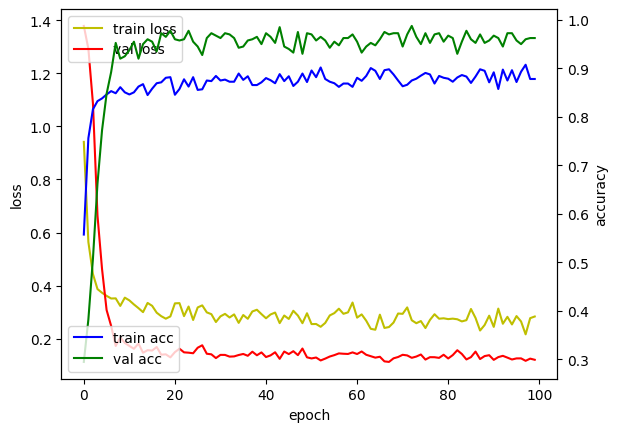

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.9615 - loss: 0.1167
compile_metrics: 96.25%


In [44]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(record.history['loss'], 'y', label='train loss')
loss_ax.plot(record.history['val_loss'], 'r', label='val loss')

acc_ax.plot(record.history['accuracy'], 'b', label='train acc')
acc_ax.plot(record.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

scores = custom_model.evaluate(X_test, Y_test)
print("%s: %.2f%%" %(custom_model.metrics_names[1], scores[1]*100))


In [45]:
sklearn_NN = MLPClassifier(hidden_layer_sizes=(64, 256, 64), batch_size=20, random_state=None, max_iter=100).fit(X_train, Y_train)
sklearn_NN_pred = sklearn_NN.predict(X_test)
accuracy = accuracy_score(Y_test, sklearn_NN_pred)
print(f"accuracy = {accuracy * 100}%")
print(classification_report(Y_test, sklearn_NN_pred, target_names=label_convert.classes_))

accuracy = 99.0%
              precision    recall  f1-score   support

  Aggressive       0.99      1.00      0.99        94
Conservative       0.97      0.99      0.98        75
    Moderate       1.00      0.99      0.99       231

   micro avg       0.99      0.99      0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400
 samples avg       0.99      0.99      0.99       400

